In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap

(50, 50)
(50, 50)
(60, 50, 50)


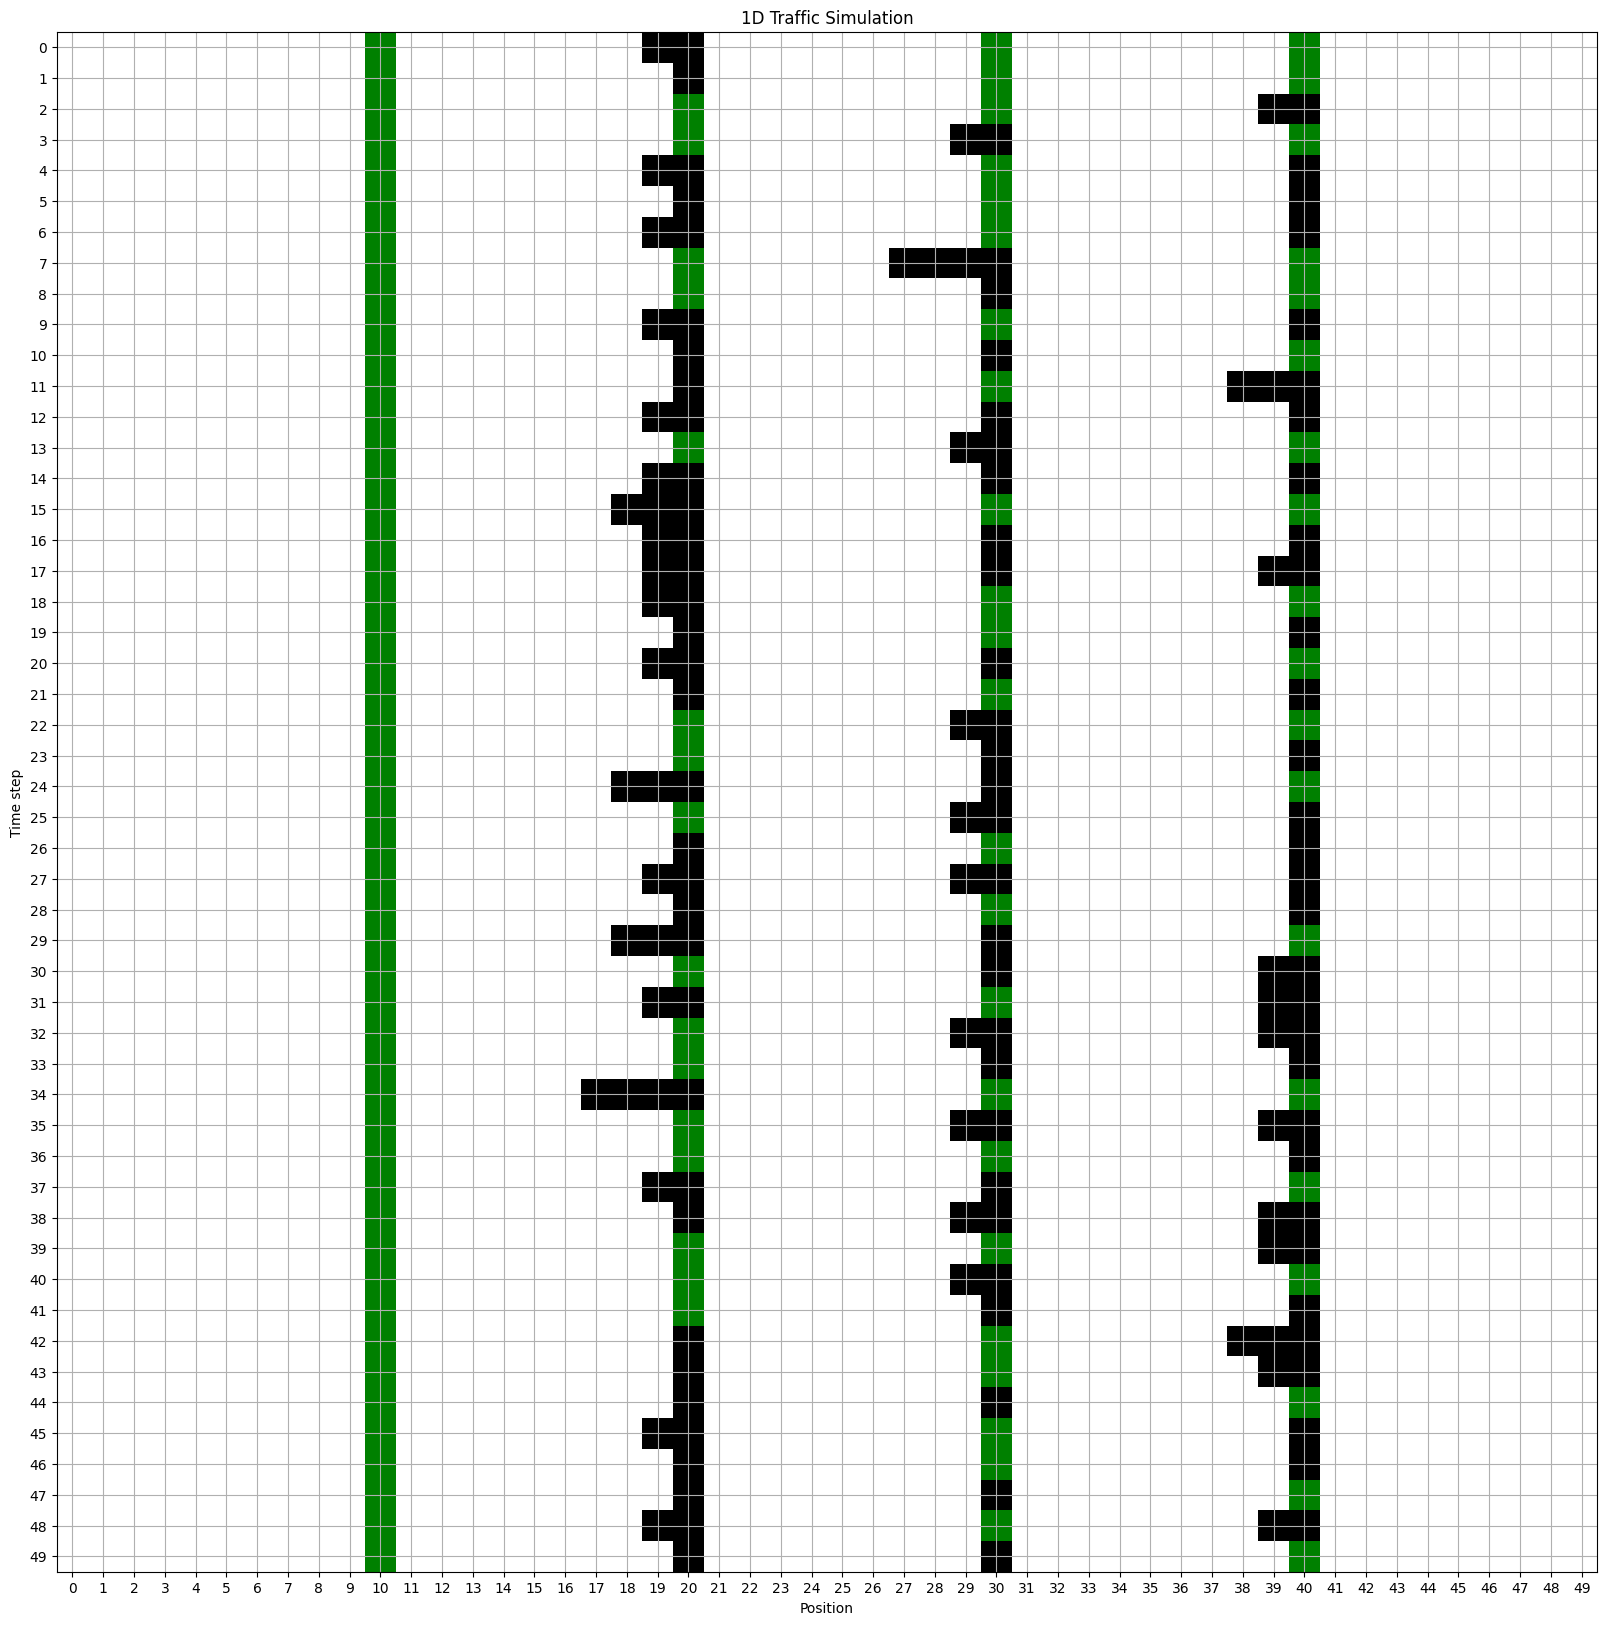

In [3]:
# Parameters
road_length = 50  # Length of the road
traffic_light_spacing = 10  # Distance between traffic lights
car_density = 0.1  # Fraction of cells that have a car at the start
traffic_light_duration = 10  # Number of time steps for which a traffic light is red

# Initialize the road
np.random.seed(0)
grid = np.zeros((road_length, road_length))
grid[:,:int(car_density*road_length)] = 1
for i in range(road_length):
    np.random.shuffle(grid[i])
print(grid.shape)

# Initialize the traffic lights
traffic_lights = np.zeros_like(grid)
traffic_lights[:,traffic_light_spacing::traffic_light_spacing] = 1
print(traffic_lights.shape)
# Define the colors
cmap = ListedColormap(['white', 'black', 'red', 'green']) # Empty, Car, Traffic Light Off, Traffic Light On

# Run the simulation
history = []
for t in range(60):  # Run for 60 time steps
    # Traffic light state (red or green) changes every traffic_light_duration time steps
    traffic_lights_state = ((t // traffic_light_duration) % 2) == 0

    # Cars move forward if the next cell is empty and there's no red light ahead
    for r in range(road_length):
        road = grid[r]
        for i in range(road_length-1, -1, -1):
            if road[i] == 1:
                if i == road_length-1:  # Remove car at the end of the road
                    road[i] = 0
                elif road[i+1] == 0 and not (traffic_lights[r, i+1] == 1 and not traffic_lights_state):  # If the next cell is empty and no red light
                    road[i+1] = 1
                    road[i] = 0

    # Capture the state
    state = np.zeros((road_length,road_length))  # For the state
    for r in range(road_length):
        road = grid[r]
        for i in range(road_length):
            if road[i] == 1:
                state[r,i] = 1  # Car
            elif traffic_lights[r, i] == 1:
                if traffic_lights_state:
                    state[r,i] = 3  # Traffic light on
                else:
                    state[r,i] = 2  # Traffic light off
            else:
                state[r,i] = 0  # Empty cell
    history.append(state)

history = np.array(history)
print(history.shape)

# Plot the simulation history
plt.figure(figsize=(20, 20))
plt.imshow(history[20], cmap=cmap, interpolation='none')
plt.ylabel('Time step')
plt.xlabel('Position')
plt.title('1D Traffic Simulation')
plt.xticks(np.arange(0, road_length, 1))
plt.yticks(np.arange(0, road_length, 1))
plt.grid(True)
plt.show()


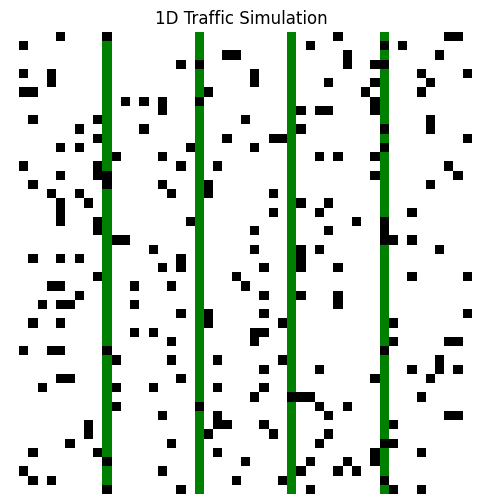

In [13]:
# Animate the simulation history
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('1D Traffic Simulation')
ax.set_axis_off()
im = plt.imshow(history[0], cmap=cmap, interpolation='none')

def animate(i):
    im.set_array(history[i])
    # return im,

anim = animation.FuncAnimation(fig, animate, frames=len(history), interval=200)
# plt.show()

# Save the animation
anim.save('traffic_simulation.mp4', fps=5, extra_args=['-vcodec', 'libx264'])

# Display the animation
from IPython.display import HTML
HTML(anim.to_jshtml())